In [1]:
!pip install pandas geopandas matplotlib pytrends pycountry osmnx folium


In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from pytrends.request import TrendReq
import pycountry
from shapely.wkt import loads
import geopandas as gpd

# Set up pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the search keywords
kw_list1 = ["barbie", "барбі", "барби"]
kw_list2 = ["Oppenheimer", "openheimer", "опенгеймер"]

# Build the payload for first three keywords
pytrends.build_payload(kw_list1, timeframe='today 1-m', geo='UA')

# Get the interest over time and sum across rows
interest_over_time_df1 = pytrends.interest_over_time().drop(columns=['isPartial']).sum(axis=1)

# Build the payload for next three keywords
pytrends.build_payload(kw_list2, timeframe='today 1-m', geo='UA')

# Get the interest over time and sum across rows
interest_over_time_df2 = pytrends.interest_over_time().drop(columns=['isPartial']).sum(axis=1)

# Create DataFrame from the series
interest_over_time_df = pd.DataFrame({'Barbie': interest_over_time_df1, 'Oppenheimer': interest_over_time_df2})

print(interest_over_time_df)
interest_over_time_df.to_csv('data.csv')


            Barbie  Oppenheimer
date                           
2023-07-05      10            2
2023-07-06      14            6
2023-07-07      20            8
2023-07-08      21            7
2023-07-09      20           15
2023-07-10      21           16
2023-07-11      21           13
2023-07-12      22           18
2023-07-13      24           13
2023-07-14      30           22
2023-07-15      31           39
2023-07-16      34           20
2023-07-17      41           28
2023-07-18      58           37
2023-07-19      87           43
2023-07-20     136          105
2023-07-21     156          101
2023-07-22     188          155
2023-07-23     199          141
2023-07-24     170          143
2023-07-25     151          102
2023-07-26     160           96
2023-07-27     150           86
2023-07-28     151           92
2023-07-29     155          109
2023-07-30     147          108
2023-07-31     103           80
2023-08-01      89           79


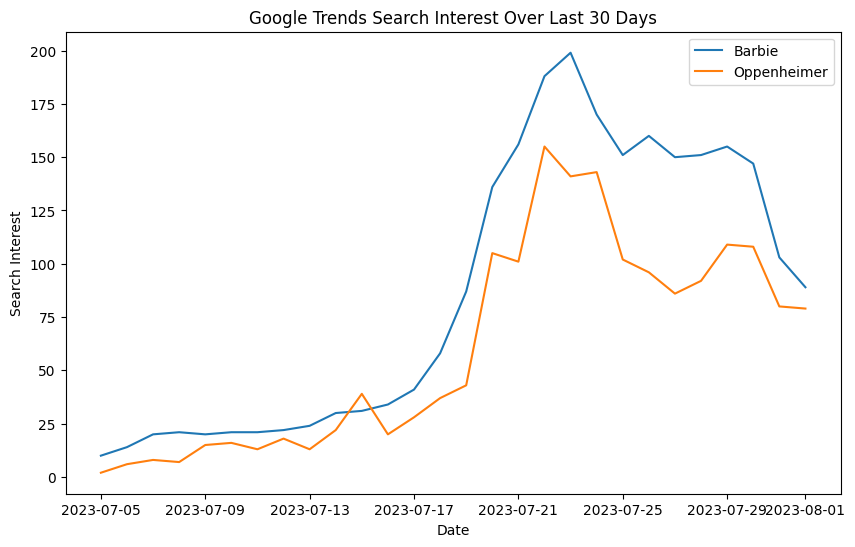

In [2]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(interest_over_time_df.index, interest_over_time_df['Barbie'], label='Barbie')
plt.plot(interest_over_time_df.index, interest_over_time_df['Oppenheimer'], label='Oppenheimer')

# Add title and labels
plt.title('Google Trends Search Interest Over Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Search Interest')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [14]:
# Set up pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the search keywords
kw_list1 = ["barbie", "барбі", "барби"]
kw_list2 = ["Oppenheimer", "openheimer", "опенгеймер"]

# Build the payload for first three keywords
pytrends.build_payload(kw_list1, timeframe='today 1-m', geo='UA')

# Get the interest over time and sum across rows
interest_over_time_df1 = pytrends.interest_over_time().drop(columns=['isPartial']).sum(axis=1)

# Build the payload for next three keywords
pytrends.build_payload(kw_list2, timeframe='today 1-m', geo='UA')

# Get the interest over time and sum across rows
interest_over_time_df2 = pytrends.interest_over_time().drop(columns=['isPartial']).sum(axis=1)

# Create DataFrame from the series
interest_over_time_df = pd.DataFrame({'Barbie': interest_over_time_df1, 'Oppenheimer': interest_over_time_df2})

# Calculate the sum of each column
sum_df = interest_over_time_df.sum().to_frame().transpose()

print(sum_df)


   Barbie  Oppenheimer
0    2409         1684


In [15]:
# Get the list of subdivisions
subdivisions = list(pycountry.subdivisions.get(country_code='UA'))

# Create a list to hold the dictionaries
data = []

# Loop through the list of subdivisions
for subdivision in subdivisions:
    # Create a dictionary for this subdivision
    data_row = {"Code": subdivision.code, "Subdivision Name": subdivision.name}
    # Add the dictionary to the list
    data.append(data_row)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('subdivisions.csv', index=False)
df

,Code,Subdivision Name
0,UA-23,Zaporizka oblast
1,UA-26,Ivano-Frankivska oblast
2,UA-30,Kyiv
3,UA-32,Kyivska oblast
4,UA-35,Kirovohradska oblast
5,UA-40,Sevastopol
6,UA-43,Avtonomna Respublika Krym
7,UA-46,Lvivska oblast
8,UA-48,Mykolaivska oblast
9,UA-51,Odeska oblast


In [16]:
# Set up pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the search keywords
kw_list1 = ["barbie", "барбі", "барби"]
kw_list2 = ["Oppenheimer", "openheimer", "опенгеймер"]

# Define the regions in Ukraine
regions = df["Code"].values.tolist()


result=[]
# Loop through each region
for region in regions:
    # Build the payload for first three keywords
    pytrends.build_payload(kw_list1, timeframe='today 1-m', geo=region)
    
    # Get the interest over time and sum across rows
    df1 = pytrends.interest_over_time()
    if 'isPartial' in df1.columns:
        df1.drop(columns=['isPartial'], inplace=True)
    interest_over_time_df1 = df1.sum().sum()
    
    # Build the payload for next three keywords
    pytrends.build_payload(kw_list2, timeframe='today 1-m', geo=region)
    
    # Get the interest over time and sum across rows
    df2 = pytrends.interest_over_time()
    if 'isPartial' in df2.columns:
        df2.drop(columns=['isPartial'], inplace=True)
    interest_over_time_df2 = df2.sum().sum()
    
    # Append the results to the DataFrame
    result.append({'Code': region, 'Barbie': interest_over_time_df1, 'Oppenheimer': interest_over_time_df2})

result_df=pd.DataFrame(result)
result_df.to_csv('google_trends_ukraine.csv', index=False)



# Merge the two DataFrames based on the 'Code' column
result_df = pd.merge(df, result_df, on='Code')



In [17]:
import osmnx as ox

def get_polygon(place_name):
    try:
        return ox.geocode_to_gdf(place_name).geometry[0]
    except Exception as e:
        print(f"Error getting polygon for {place_name}: {e}")
        return None
result_df['polygon'] = result_df['Code'].apply(get_polygon)
result_df.to_csv('result_df.csv', index=False)
result_df

,Code,Subdivision Name,Barbie,Oppenheimer,polygon
0,UA-23,Zaporizka oblast,1212,596.0,"POLYGON ((34.1394646 47.4772499, 34.1416882 47..."
1,UA-26,Ivano-Frankivska oblast,1522,1303.0,"POLYGON ((23.5470764 48.7253908, 23.5479919 48..."
2,UA-30,Kyiv,2058,1863.0,"POLYGON ((30.2361453 50.4268097, 30.237359 50...."
3,UA-32,Kyivska oblast,2144,1348.0,"MULTIPOLYGON (((29.2675489 51.2648114, 29.2679..."
4,UA-35,Kirovohradska oblast,1135,635.0,"POLYGON ((29.7493056 48.2894556, 29.7550311 48..."
5,UA-40,Sevastopol,1153,871.0,"POLYGON ((33.0912003 44.575292, 33.0923427 44...."
6,UA-43,Avtonomna Respublika Krym,1123,323.0,"POLYGON ((32.201579 45.396892, 32.2027213 45.3..."
7,UA-46,Lvivska oblast,1873,1170.0,"MULTIPOLYGON (((22.6408214 49.5299899, 22.6442..."
8,UA-48,Mykolaivska oblast,1648,958.0,"POLYGON ((30.2068714 48.0677683, 30.2192965 48..."
9,UA-51,Odeska oblast,1663,1257.0,"POLYGON ((28.2138288 45.4672099, 28.222847 45...."


In [18]:
# Importing necessary libraries
import pandas as pd

# Loading the provided CSV file
file_path = "result_df.csv"
result_df = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure of the data
result_df.head()


,Code,Subdivision Name,Barbie,Oppenheimer,polygon
0,UA-23,Zaporizka oblast,1212,596.0,"POLYGON ((34.1394646 47.4772499, 34.1416882 47..."
1,UA-26,Ivano-Frankivska oblast,1522,1303.0,"POLYGON ((23.5470764 48.7253908, 23.5479919 48..."
2,UA-30,Kyiv,2058,1863.0,"POLYGON ((30.2361453 50.4268097, 30.237359 50...."
3,UA-32,Kyivska oblast,2144,1348.0,"MULTIPOLYGON (((29.2675489 51.2648114, 29.2679..."
4,UA-35,Kirovohradska oblast,1135,635.0,"POLYGON ((29.7493056 48.2894556, 29.7550311 48..."


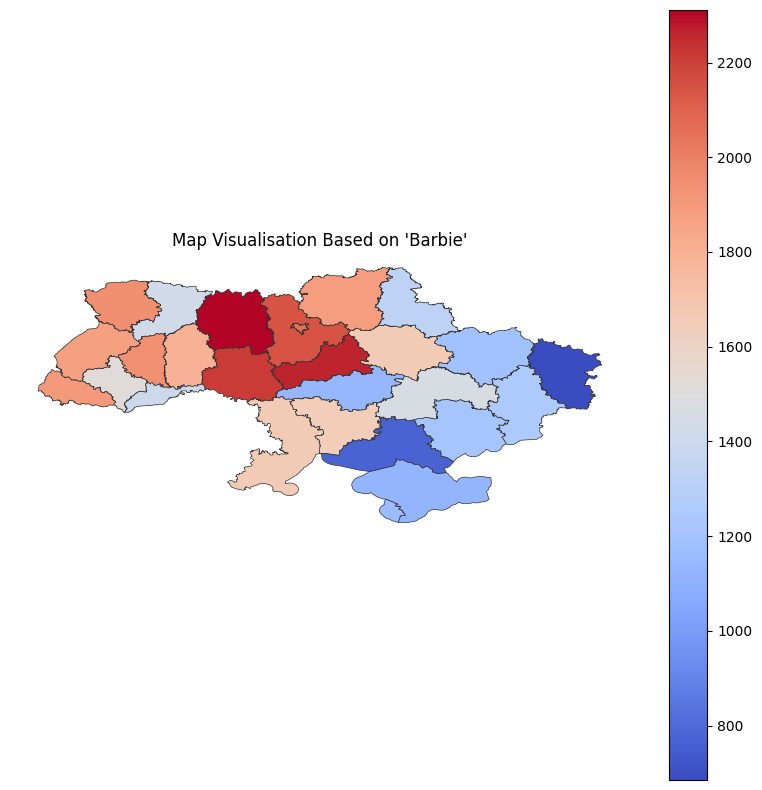

In [22]:


# Converting the 'polygon' column to a GeoSeries
result_df['geometry'] = result_df['polygon'].apply(loads)
geo_df = gpd.GeoDataFrame(result_df, geometry='geometry')

# Plotting the map based on the "Barbie" column using a gradient color scheme
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(column='Barbie', cmap='coolwarm', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
plt.title("Map Visualisation Based on 'Barbie'")
plt.axis('off')
plt.show()



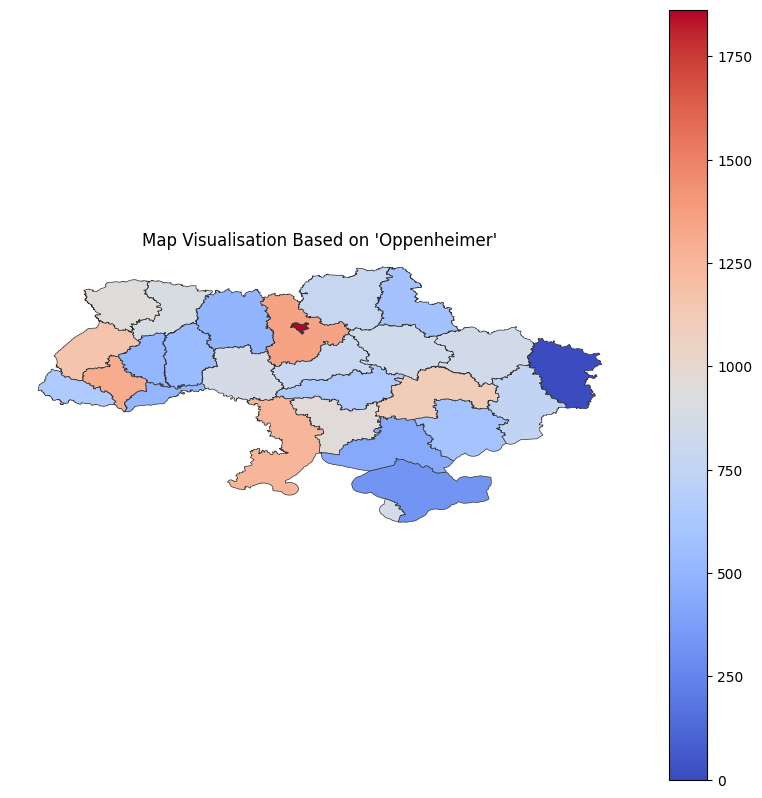

In [23]:
# Plotting the map based on the "Oppenheimer" column using a gradient color scheme
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(column='Oppenheimer', cmap='coolwarm', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
plt.title("Map Visualisation Based on 'Oppenheimer'")
plt.axis('off')
plt.show()


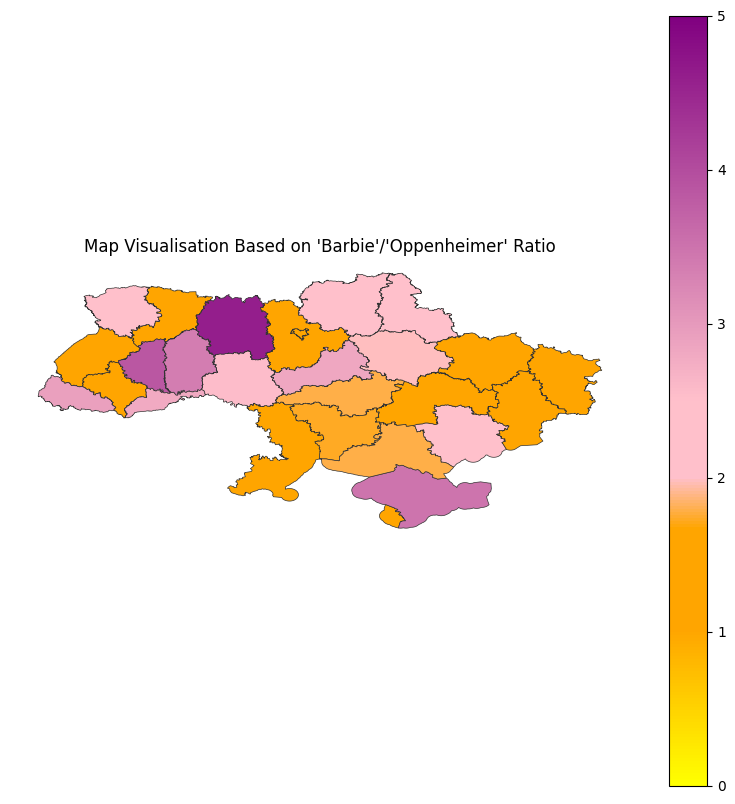

In [24]:

# Calculating the ratio of "Barbie" to "Oppenheimer", handling division by zero
geo_df['ratio'] = np.where(geo_df['Oppenheimer'] != 0, geo_df['Barbie'] / geo_df['Oppenheimer'], 1)

# Defining the custom color map for the specified ranges
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    [
        (0, 'yellow'),
        (1/5, 'orange'),
        (1/3, 'orange'),
        (2/5, 'pink'), # Representing sexy pink
        (1/2, 'pink'),
        (6/6, 'purple')
    ]
)

# Plotting the map based on the calculated ratio using the custom color map
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(column='ratio', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='0.2', legend=True, vmin=0, vmax=5)
plt.title("Map Visualisation Based on 'Barbie'/'Oppenheimer' Ratio")
plt.axis('off')
plt.show()
